In [5]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot_spk_mem_spk(spk_in, mem, spk_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4]})

  # Plot input current
  splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)
  plt.yticks([]) 

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk_rec, ax[2], s=400, c="black", marker="|")
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()


In [11]:
num_steps = 200
lif3 = snn.Lapicque(R=5.1,C=5e-3,time_step=1e-3,threshold=0.5,reset_mechanism="zero")
spk_in = spikegen.rate_conv(torch.ones((num_steps,1))*0.40)

print(f"There are {int(sum(spk_in))} total spikes out of {len(spk_in)} time steps")

There are 86 total spikes out of 200 time steps


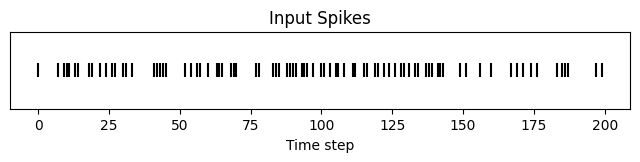

In [12]:
fig = plt.figure(facecolor="w",figsize=(8,1))
ax = fig.add_subplot(111)

splt.raster(spk_in.reshape(num_steps,-1),ax,s=100,c="black",marker="|")
plt.title("Input Spikes")
plt.xlabel("Time step")
plt.yticks([])
plt.show()

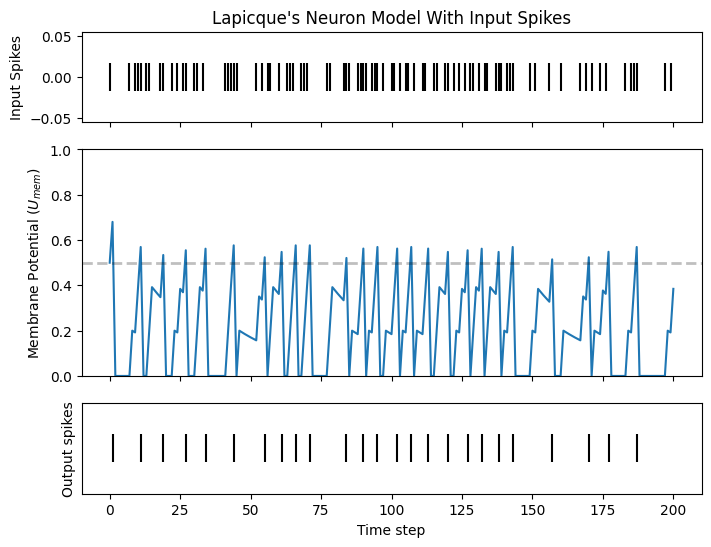

In [13]:
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

for step in range(num_steps):
    spk_out, mem = lif3(spk_in[step],mem)
    spk_rec.append(spk_out)
    mem_rec.append(mem)

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_spk_mem_spk(spk_in, mem_rec, spk_rec, "Lapicque's Neuron Model With Input Spikes")
